In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
%matplotlib inline

# Exploratory Analysis - Household Power Consumption dataset
The dataset is a multivariate time series that describes the electricity consumption for a single household over four years collected between December 2006 and November 2010 taking observations of power consumption every minute.

In [2]:
path = 'power-consumption/'
files = glob.glob(os.path.join(path, "*.txt"))
multi_file_df = (pd.read_csv(file, sep=';', low_memory=False, na_values=['nan','?'], parse_dates={'Date_time':['Date','Time']},
    index_col='Date_time', infer_datetime_format=True, header=0) for file in files)

In [3]:
df = pd.concat(multi_file_df)
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [4]:
df['Sub_metering_4'] = (df.iloc[:,0] * 1000 / 60) - (df.iloc[:,4] + df.iloc[:,5] + df.iloc[:,6])

Dataset description, where:
- global_active_power -> Household global minute-averaged active power (in kilowatts)
- global_reactive_power -> Household global minute-averaged reactive power (in kilowatts)
- voltage -> Minute-averaged voltage (in volts)
- global_intensity -> Household global minute-averaged current intensity (in amperes)
- sub_metering_1 -> Corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
- sub_metering_2 -> Corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
- sub_metering_3 -> Corresponds to an electric water-heater and an air-conditioner.
- sub_metering_4 -> Corresponds to electrical equipment not measured in sub-meterings 1, 2 and 3.

In [5]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


In [6]:
print(f'Rows with all missing values: {len(df[df.isnull().all(1) == True])}')

Rows with all missing values: 25979


<AxesSubplot:xlabel='Date_time', ylabel='Sub_metering_4'>

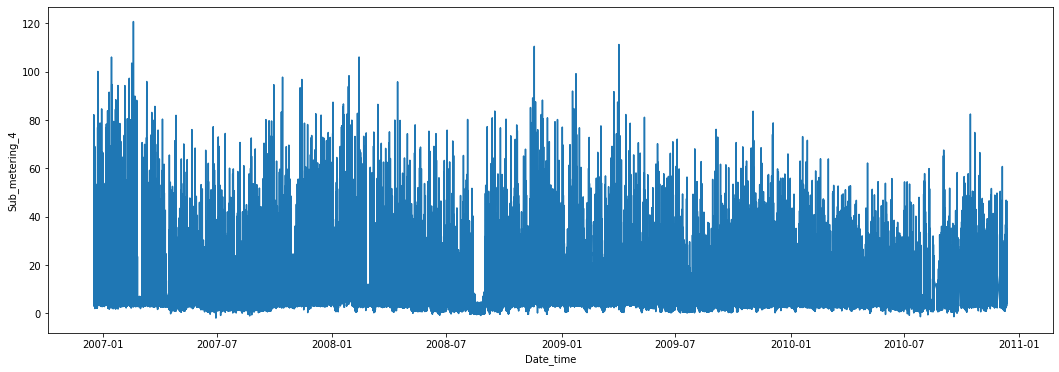

In [7]:
fig = plt.figure(figsize=(18, 6))
sns.lineplot(x = "Date_time", y = "Sub_metering_4", data = df[::10])

In [8]:
df.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Date_time,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667


In [9]:
processed_path = os.path.join(path, ".processed")
if not os.path.exists(processed_path):
    os.mkdir(processed_path)
df.to_csv(os.path.join(processed_path, "household-pow.csv"))